In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [3]:
df = pd.read_csv("D:/Udemy/ML/Data Folder/Diabetes/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


Defination of Features:
1. Pregnancies - Number of Pregnancies
2. Glucose - Plasma glucose concentration a 2 hours in an oral glucose tolerance test
3. BloodPressure - Diastolic blood pressure (mm Hg)
4. SkinThickness - Triceps skin fold thickness (mm)
5. Insulin - 2-Hour serum insulin (mu U/ml)
6. BMI - Body mass index (weight in kg / (height in m)^2)
7. DiabetesPedigreeFunction - Diabetes pedigree function
8. Age - Age (years)
9. Outcome - Class variable (1 = True, 0 = False)

Here only outcome is Dependent

Every other feature is Independent

Checking for null values

In [15]:
df.isnull().values.any()

False

In [8]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


We can se that there are no correlated variables.

<Axes: >

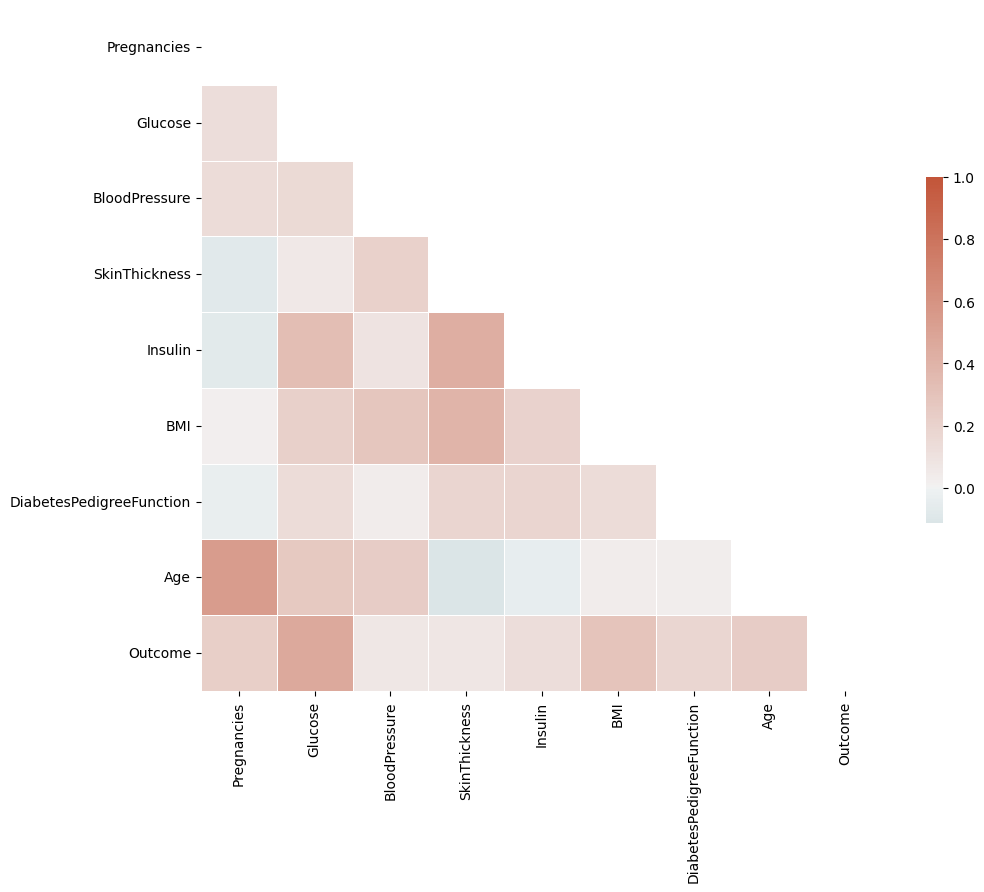

In [10]:
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype = bool)) # only the upper triangular part of the matrix is visible
f,ax = plt.subplots(figsize = (11,9))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr, mask = mask, cmap=cmap, vmax=1, center=0, square=True, linewidths=.5, cbar_kws={"shrink":.5})

<Axes: >

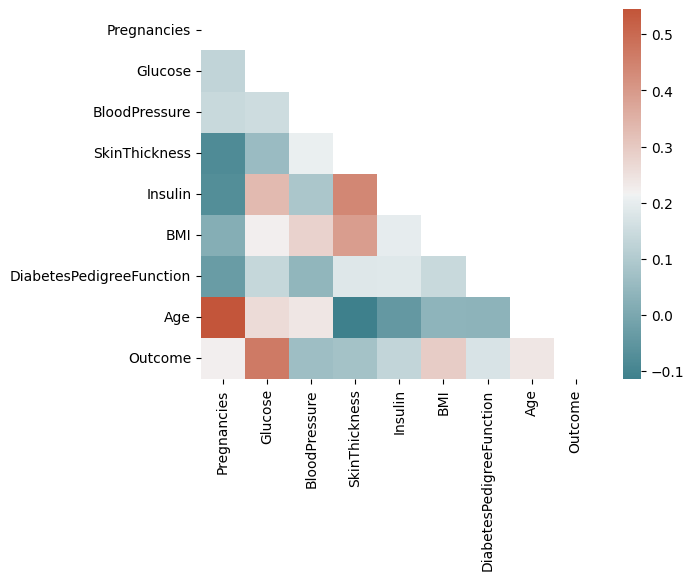

In [13]:
mask = np.triu(np.ones_like(corr, dtype = bool))
cmap = sns.diverging_palette(210, 20, as_cmap=True)
sns.heatmap(corr,mask=mask, cmap=cmap)

The correlation looks good there appear to be no correlated columns

Data Types

Inspect data types to see if there are any issues.

The data and its data type(s) look good enough.

In [14]:
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check Class distribution

In [18]:
num_obs = len(df)
num_true = len(df.loc[df['Outcome']==1])
num_false = len(df.loc[df['Outcome']==0])
print("Number of True Cases: {0} ({1:2.2f} %)". format(num_true, ((1.0*num_true)/(1.0*num_obs))*100))
print("Number of False Cases: {0} ({1:2.2f} %)". format(num_false, ((1.0*num_false)/(1.0*num_obs))*100))

Number of True Cases: 268 (34.90 %)
Number of False Cases: 500 (65.10 %)


A good distribution

Splitting the Dataset

In [19]:
X = df.drop(columns=['Outcome'])
Y = df['Outcome']

In [20]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.3, random_state=42)

We have to ensure we have desired 70% train and 30% test data

In [22]:
train_val = ((1.0*len(X_train))/(1.0*len(X))*100)
test_val = ((1.0*len(X_test))/(1.0*len(X))*100)
print("{0:0.2f} is training data".format(train_val))
print("{0:0.2f} is test data".format(test_val))

69.92 is training data
30.08 is test data


Check whether the "Outcome" feature was split properly

In [34]:
ori_val1 = len(df.loc[df['Outcome']==1])
ori_val0 = len(df.loc[df['Outcome']==0])
print("Original True : {0} ({1:2.2f}%)".format(ori_val1, ((1.0*ori_val1)/(1.0*len(df)))*100))
print("Original False : {0} ({1:2.2f}%)".format(ori_val0, ((1.0*ori_val0)/(1.0*len(df)))*100))
print("")

trainy_val1 = len(Y_train.loc[Y_train[:]==1])
trainy_val0 = len(Y_train.loc[Y_train[:]==0])
print("Training True : {0} ({1:2.2f}%)".format(trainy_val1, ((1.0*trainy_val1)/(1.0*len(Y_train)))*100))
print("Training False : {0} ({1:2.2f}%)".format(trainy_val0, ((1.0*trainy_val0)/(1.0*len(Y_train)))*100))
print("")

testy_val1 = len(Y_test.loc[Y_test[:]==1])
testy_val0 = len(Y_test.loc[Y_test[:]==0])
print("Testing True : {0} ({1:2.2f}%)".format(testy_val1, ((1.0*testy_val1)/(1.0*len(Y_test)))*100))
print("Testing False : {0} ({1:2.2f}%)".format(testy_val0, ((1.0*testy_val0)/(1.0*len(Y_test)))*100))

Original True : 268 (34.90%)
Original False : 500 (65.10%)

Training True : 188 (35.01%)
Training False : 349 (64.99%)

Testing True : 80 (34.63%)
Testing False : 151 (65.37%)


In [36]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Check whether the features contain 0 value if yes then impute it 

In [41]:
print("--> Rows in Data: {0}".format(len(df)))
print("--> Rows Missing (Glucose): {0}".format(len(df.loc[df['Glucose']==0])))
print("--> Rows Missing (BloodPressure): {0}".format(len(df.loc[df['BloodPressure']==0])))
print("--> Rows Missing (SkinThickness): {0}".format(len(df.loc[df['SkinThickness']==0])))
print("--> Rows Missing (Insulin): {0}".format(len(df.loc[df['Insulin']==0])))
print("--> Rows Missing (BMI): {0}".format(len(df.loc[df['BMI']==0])))
print("--> Rows Missing (DiabetesPedigreeFunction): {0}".format(len(df.loc[df['DiabetesPedigreeFunction']==0])))
print("--> Rows Missing (Age): {0}".format(len(df.loc[df['Age']==0])))


--> Rows in Data: 768
--> Rows Missing (Glucose): 5
--> Rows Missing (BloodPressure): 35
--> Rows Missing (SkinThickness): 227
--> Rows Missing (Insulin): 374
--> Rows Missing (BMI): 11
--> Rows Missing (DiabetesPedigreeFunction): 0
--> Rows Missing (Age): 0


Impute all the 0 values with mean

In [42]:
from sklearn.impute import SimpleImputer
fill_0 = SimpleImputer(missing_values=0, strategy='mean')

X_train = fill_0.fit_transform(X_train)
X_test = fill_0.fit_transform(X_test)

Classification model

1. SVM

In [55]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix

In [56]:
svc = SVC(C=.1,kernel='linear',gamma = 1)
svc.fit(X_train, Y_train)

SVC(C=0.1, gamma=1, kernel='linear')

In [62]:
ypred = svc.predict(X_test)
print("Accuracy for SVM is ",accuracy_score(Y_test,ypred))

Accuracy for SVM is  0.7402597402597403


In [58]:
print ("Confusion Matrix: \n")
print (confusion_matrix(Y_test, ypred, labels = [1, 0])) 

Confusion Matrix: 

[[ 46  34]
 [ 26 125]]


2. KNN

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=7)

In [64]:
ypredknn = knn.predict(X_test)
print("Accuracy for KNN is",accuracy_score(Y_test, ypredknn))

Accuracy for KNN is 0.670995670995671


In [66]:
print ("Confusion Matrix: \n")
print (confusion_matrix(Y_test, ypredknn, labels = [1, 0])) 

Confusion Matrix: 

[[ 46  34]
 [ 42 109]]


3. Logistic Regression

In [67]:
from sklearn.linear_model import LogisticRegression

In [69]:
logistic =  LogisticRegression(max_iter=500)
logistic.fit(X_train,Y_train)

LogisticRegression(max_iter=500)

In [77]:
ypredlogistic = logistic.predict(X_test)
print("Accuracy for Logistic Regression is",accuracy_score(Y_test, ypredlogistic))

Accuracy for Logistic Regression is 0.7359307359307359


In [78]:
print ("Confusion Matrix: \n")
print (confusion_matrix(Y_test, ypredlogistic, labels = [1, 0])) 

Confusion Matrix: 

[[ 47  33]
 [ 28 123]]


Comparing all the 3 models

Text(0.5, 0, 'False Positive Rate')

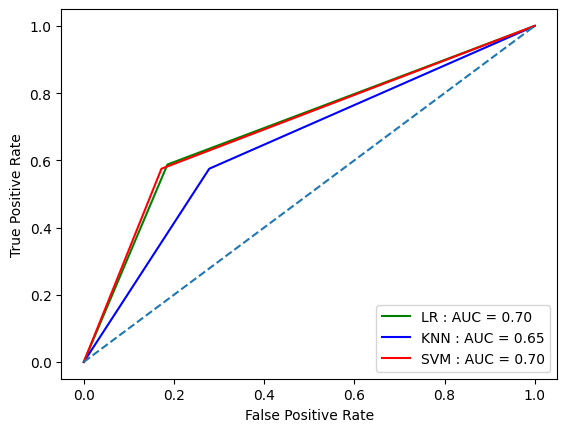

In [86]:
from sklearn.metrics import roc_curve, auc

y_prob = ypredlogistic
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
accuracy_score(Y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='green',label = 'LR : AUC = %0.2f' % roc_auc)

y_prob = ypredknn
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
accuracy_score(Y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='blue' ,label = 'KNN : AUC = %0.2f' % roc_auc)

y_prob = ypred
y_pred = np.where(y_prob > 0.5, 1, 0) # This will threshold the probabilities to give class predictions.
accuracy_score(Y_test, y_pred)
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'SVM : AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')